# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits waves 4,5,6 merge on year and country
merge_share_ewcs("3digits_w456_year_country.csv", convert_to_3_digits=True)
# 3 digits waves 4,5,6 common merge on year and country
merge_share_ewcs(
    "3digits_w456_year_country_balanced.csv", convert_to_3_digits=True, balanced=True
)
# 3 digits waves 4,6 merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country.csv", convert_to_3_digits=True, exclude_wave_5=True
)
# 3 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
)

# 3 digits waves 4,5,6 merge on year
merge_share_ewcs(
    "3digits_w456_year.csv", convert_to_3_digits=True, not_country_wise=True
)
# 3 digits waves 4,5,6 common merge on year
merge_share_ewcs(
    "3digits_w456_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 merge on year
merge_share_ewcs(
    "3digits_w46_year.csv",
    convert_to_3_digits=True,
    exclude_wave_5=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 common merge on year
merge_share_ewcs(
    "3digits_w46_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

# 4 digits waves 4,5,6 merge on year and country
merge_share_ewcs("4digits_w456_year_country.csv")
# 4 digits waves 4,5,6 common merge on year and country
merge_share_ewcs("4digits_w456_year_country_balanced.csv", balanced=True)
# 4 digits waves 4,6 merge on year and country
merge_share_ewcs("4digits_w46_year_country.csv", exclude_wave_5=True)
# 4 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "4digits_w46_year_country_balanced.csv", balanced=True, exclude_wave_5=True
)

# 4 digits waves 4,5,6 merge on year
merge_share_ewcs("4digits_w456_year.csv", not_country_wise=True)
# 4 digits waves 4,5,6 common merge on year
merge_share_ewcs("4digits_w456_year_balanced.csv", balanced=True, not_country_wise=True)
# 4 digits waves 4,6 merge on year
merge_share_ewcs("4digits_w46_year.csv", exclude_wave_5=True, not_country_wise=True)
# 4 digits waves 4,6 common merge on year
merge_share_ewcs(
    "4digits_w46_year_balanced.csv",
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_w456_year_country_balanced : 991 unique ids
4digits_w456_year_country_balanced : 666 unique ids
4digits_w46_year_country : 1782 unique ids
4digits_w456_year_country : 1823 unique ids
3digits_w46_year_country : 2133 unique ids
3digits_w456_year_balanced : 1231 unique ids
4digits_w46_year_country_balanced : 716 unique ids
4digits_w46_year_balanced : 1277 unique ids
4digits_w46_year : 2310 unique ids
4digits_w456_year : 2380 unique ids
3digits_w46_year_country_balanced : 1067 unique ids
3digits_w456_year_country : 2197 unique ids
3digits_w456_year : 2427 unique ids
3digits_w46_year_balanced : 1329 unique ids
4digits_w456_year_balanced : 1118 unique ids
3digits_w46_year : 2347 unique ids


In [4]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_balanced.csv"
)

Number of unique IDs: 1277
Number of unique IDs by country:
country
Austria           133
Belgium           213
Czech Republic    127
Denmark           111
Estonia           267
France            145
Italy             100
Slovenia           72
Spain             109
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    1277
2015    1277
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  2554.00  2554.00      2554.00       2554.00
mean     55.57     0.57         1.88         13.11
std       3.03     0.50         1.28          4.02
min      50.00     0.00         0.00          0.00
25%      53.00     0.00         1.00         11.00
50%      55.00     1.00         2.00         13.00
75%      58.00     1.00         3.00         16.00
max      64.00     1.00        10.00         36.00


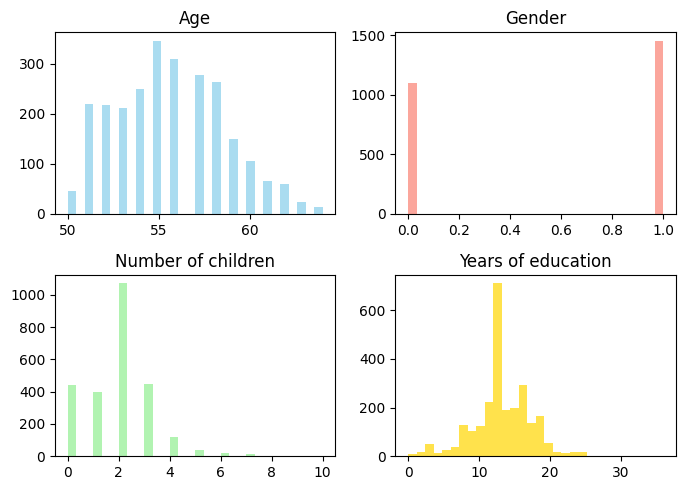


Job Status:
job_status
Employee                   0.35
Private sector employee    0.26
Public sector employee     0.18
Self-employed              0.12
Civil servant              0.09
Name: proportion, dtype: float64

Industry of Employment:
industry
Education                                       0.15
Other community                                 0.13
Health and social work                          0.13
Manufacturing                                   0.11
Wholesale and retail trade                      0.11
Public administration and defence               0.11
Transport, storage and communication            0.06
Construction                                    0.05
Agriculture, hunting, forestry, fishing         0.04
Financial intermediation                        0.03
Hotels and restaurants                          0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Mining and quarrying                            0.01
Name: p

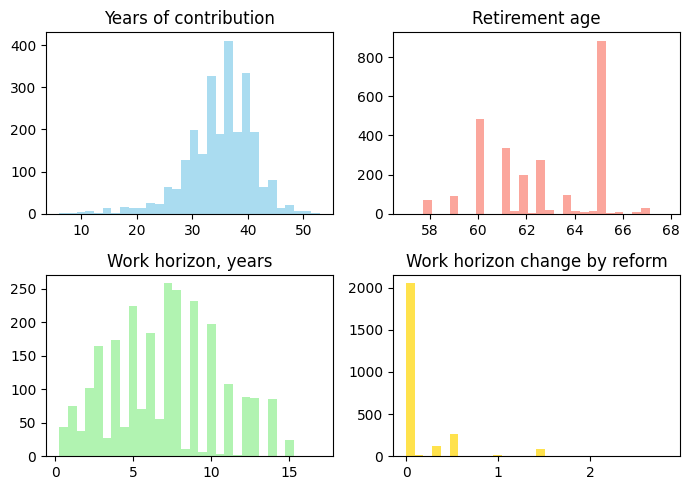


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.41
1       0           0.33
0       1           0.20
1       1           0.06
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.82
1    0.18
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     680
1.0     631
2.0     486
3.0     309
4.0     215
5.0     123
6.0      63
7.0      28
9.0       8
8.0       8
10.0      2
12.0      1
Name: count, dtype: int64


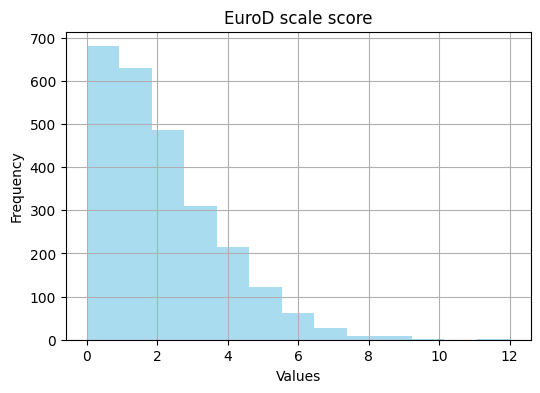


Working Conditions:
       jqi_monthly_earnings  jqi_skills_discretion  jqi_social_environment  \
count               2554.00                2554.00                 2554.00   
mean                1575.23                  59.59                   80.49   
std                  506.34                  14.01                    4.90   
min                  307.61                  25.58                   50.00   
25%                 1248.90                  48.94                   78.26   
50%                 1504.17                  59.86                   81.10   
75%                 1817.04                  71.25                   83.29   
max                 4320.87                  90.73                  100.00   

       jqi_physical_environment  jqi_intensity  jqi_prospects  \
count                   2554.00        2554.00        2554.00   
mean                      84.65          51.64          59.68   
std                        8.68           7.64           9.84   
min             

In [5]:
describe_data(df)